**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo (A)

---


Aluna(o): Eduardo Barros Pimenta - Gerente

---

Aluna(o): Thiago Emanuell Vieira Moura - Engenheiro de Conhecimento

---

Aluna(o): Wendel Marques de Jesus Souza - Analista de Dados

---

#Especificação do problema: Árvore de Decisão

A área financeira é uma área muito interessante para a aplicação de técnicas de Inteligência Artificial. Por exemplo, pode-se desenvolver aplicações que dêem suporte aos agentes financeiros na concessão ou não de crédito aos seus clientes. Pode-se também utilizar-se das técnicas de Inteligência Artificial para a identificação de atividades fraudulentas.

Utilizando a base de dados [Paysim](https://www.kaggle.com/ntnu-testimon/paysim1) projete e implemente uma árvore de decisão para a identificação de fraudes. Utilize a referência a seguir para a visualização da árvore projetada.

[Para visualização de uma AD.](https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084)



### Recomendações

**Recomendações:**

   O primeiro passo para resolver um problema é entendê-lo muito bem, considerar o contexto e fazer as abstrações necessárias. A seguir, para não "reinventar a roda" é preciso identificar como a comunidade resolveu o problema em questão, ou problemas parecidos, cuja solução possa ser mapeada para situação em análise. Desta forma, deve ser feito um estudo, o mais amplo possível sobre esse assunto. O próximo passo é o grupo se reunir e instanciar o modelo em estudo para o caso específico do problema a ser resolvido. Em paralelo, uma análise rigorosa deve ser feita na base de dados a fim de prepará-la para seu uso no modelo. Finalmente, com o modelo bem compreendido e instanciado e os dados devidamente preparados, a implementação do modelo pode ser feita.
   
    

**Observação**: O trabalho deve ser feito EM GRUPO, mas a avaliação será feita individualmente. Para isso, o grupo deverá fazer um planejamento/cronograma de trabalho.

### Produtos a serem entregues

**Produtos a serem entregues:**



1.   Relatório técnico, no formato especificado (gerente)
2.   Notebook com a AED (analista de dados). A base de dados original não deve ser alterada. Todo o processamento e seleção dos dados a serem utilizados deve ser feita na aplicação.
3.   Notebook com a implementação (engenheiro de conhecimento)
4.   Video de apresentação do trabalho (gerente) - no grupo com 4 alunos, essa tarefa deve ser feita pelo quarto aluno, e não pelo gerente.




### Bibliotecas utilizadas

In [ ]:
#implementacoes
!pip install scikit-plot 
!pip install ipywidgets #Instalando biblioteca para interatividade
!pip install --upgrade ipython jupyter  #Instalando biblioteca para imprimir, graficamente, a árvore, em SVG, na tela
!pip install --upgrade pip

     |████████████████████████████████| 788kB 18.2MB/s 
Requirement already up-to-date: jupyter in /usr/local/lib/python3.7/dist-packages (1.0.0)
     |████████████████████████████████| 368kB 38.1MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


     |████████████████████████████████| 1.5MB 16.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
#Pré-processamento
import pandas as pd # processamento de dados, entrada e saída de arquivos CSV(e.g. pd.read_csv)
import numpy as np # algebra linear
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

#Implementações
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display 
from ipywidgets import interactive
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

### Leitura dos dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lendo os dados
#O arquivo precisa estar baixado no "MyDrive"
data = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv') 

# Pré-processamento  
Por: Wendel

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Limpeza e transformação

Descartamos do conjunto de dados as variáveis *isFlaggedFraud*, *nameOrig* e *nameDest* porque são do tipo ID  e não contribuem para a máquina preditiva.

Não precisamos ensinar para a máquina preditiva que se *nameDest* for um comerciante, então não haverá fraude. Isso porque, cumprimos essa tarefa ao utiliza *PAYMENT*. Como mostrado na análise e exploração dos dados, só há fraudes apenas quando as transações são do tipo *TRANSFER* e *CASH_IN*.

Obs.: Em uma aplicação mais sofisticada, é provável que o uso de *nameOrig* e *nameDest* se torne necessário, uma vez que ao descartar esses atributos, descartamos também as conexões entre as transações. Isto é, ao fazer isto, deixamos de explorar esquemas de fraude mais aperfeiçoados. 

In [ ]:
data = data.drop(["isFlaggedFraud","nameOrig","nameDest"],axis=1)
data.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0


Para que possamos utilizar a técnica de balanceamento escolhida, devemos conveter o atributo categórico (*type*) em numérico.

In [ ]:
#transformação do dataFrame com uma coluna de variáveis categóricas em colunas que representam cada tipo de transação
data_type = pd.get_dummies(data.type)
# data_type = data_type.drop(["CASH_IN","DEBIT","PAYMENT"],axis=1)
data_type.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [ ]:
#mesclagem com o dataframe original
data = data.drop(["type"],axis=1)
data = data.join(data_type)
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [ ]:
#reescala os dados
data_minMax = data.copy()
data_minMax[['amount', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceDest', 'oldbalanceOrg']] = MinMaxScaler().fit_transform(data[['amount', 'newbalanceOrig', 'newbalanceDest', 'oldbalanceDest', 'oldbalanceOrg']])

data = data_minMax.copy()
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,0.000106,0.002855,0.003233,0.000000,0.0,0,0,0,0,1,0
1,1,0.000020,0.000357,0.000391,0.000000,0.0,0,0,0,0,1,0
2,1,0.000002,0.000003,0.000000,0.000000,0.0,1,0,0,0,0,1
3,1,0.000002,0.000003,0.000000,0.000059,0.0,1,0,1,0,0,0
4,1,0.000126,0.000697,0.000603,0.000000,0.0,0,0,0,0,1,0


### Divisão: dados de treino e de teste

In [ ]:
#Separando os dados para treinamento e teste 
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

#Separação de dados treino e dados de teste
#Proporção de 30% para teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)



### Balanceamento

Como visto na etapa AED, do número total de transações (6.362.620) apenas 0,13% são transações frauldulentas. Nesse sentido, é necessário realizar o balanceamento da classe *target* (isFraud).

A técnica escolhida é a Oversampling que é o processo de criar observações sintéticas da classe minoritária - nesse caso, isFraud.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    5749
0    5749
dtype: int64


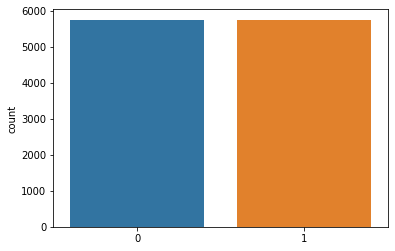

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

# Implementação
Por: Thiago

In [ ]:
#Classificador da árvore de decisão
estimator = DecisionTreeClassifier(max_depth=3,criterion='entropy') 
#Construindo um classificador de árvore de decisão a partir do conjunto de treinamento 
estimator.fit(X_res,y_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Armazenando os nomes das colunas em um objeto
colunas = data.drop(['isFraud'], axis=1).columns
#Transformando o objeto em um vetor
colunas = np.array(colunas) 

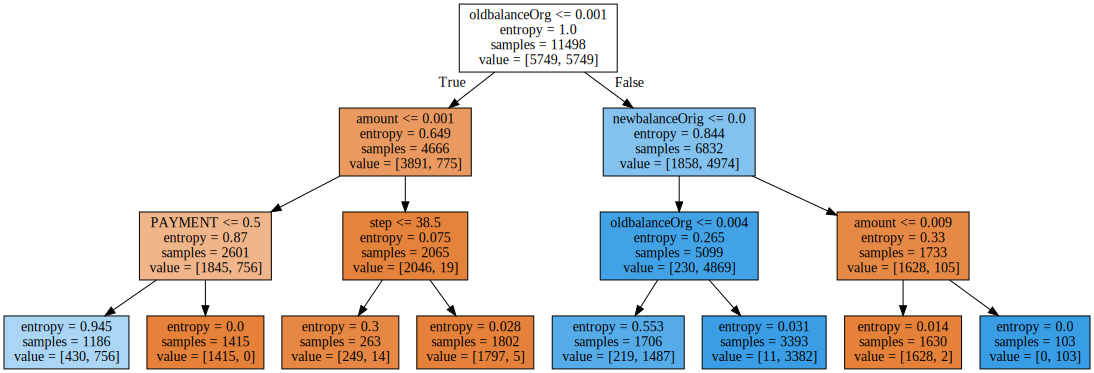

In [ ]:
#Imprimindo a árvore
graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=colunas, filled = True))
display(SVG(graph.pipe(format='svg')))

# Implementação Interativa
Por: Thiago

In [ ]:
#Definindo a função de plotagem da árvore
def plot_tree(crit, split, depth, min_split, min_leaf=0.2): 
  #Classificador da árvore de decisão
  estimator = DecisionTreeClassifier(random_state = 0 
                                    , criterion = crit
                                    , splitter = split
                                    , max_depth = depth
                                    , min_samples_split=min_split
                                    , min_samples_leaf=min_leaf)
  
  #Construindo um classificador de árvore de decisão a partir do conjunto de treinamento 
  estimator.fit(X_train, y_train)

  #Definindo processo de impressão da árvore
  graph = Source(tree.export_graphviz(estimator
                                      , out_file=None
                                      , feature_names=colunas
                                      , filled = True))
   
  display(SVG(graph.pipe(format='svg'))) 

  #Retorna o classificador
  return estimator

#Definição da função Interativa
inter = interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,6,7,8,9,10]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))

#Plotagem da função Interativa
display(inter)

#(OBS : A árvore demora atualizar à cada interação)

Acurácia média:  0.8854916161371678 

Matriz de confusão: 
[[1687757  218565]
 [      7    2457]]


              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1906322
           1       0.01      1.00      0.02      2464

    accuracy                           0.89   1908786
   macro avg       0.51      0.94      0.48   1908786
weighted avg       1.00      0.89      0.94   1908786



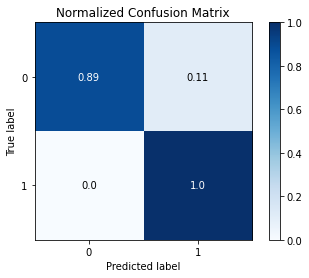

In [ ]:
# Previsão da classe de teste 
predictions = estimator.predict(X_val)

# Acurárica das previsões
print("Acurácia média: ", estimator.score(X_val, y_val), "\n")
print("Matriz de confusão: ")
print(confusion_matrix(y_val, predictions))
print("\n")
print(classification_report(y_val, predictions))
skplt.metrics.plot_confusion_matrix(y_val, predictions, normalize=True)